# Исследование успешности компьютерных игр

В нашем распоряжении исторические данные до 2016 года из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.    

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию.

**План работы.**
   
  1. Открыть файл с данными и изучить общую информацию.  
  

  2. Провести предобработку данных:     
        
    - Привести названия столбцов к нижнему регистру. 
    - Обработать пропуски и избавиться от дубликатов при необходимости.   
    - Преобразовать данные в нужные типы.        
    - Создать столбец с суммарными продажами во всех регионах. 
    

  3. Провести исследовательский анализ данных:   
        
    - Количество выпускаемых игр по годам.   
    - Изменение продаж по платформам.   
    - За какой характерный срок появляются новые и исчезают старые платформы?  
    - Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.  
    - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.  
    - Выяснить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.  
    - Соотнести выводы с продажами игр на других платформах.  
    - Изучить общее распределение игр по жанрам. 
    

  4. Составить портрет пользователя каждого региона: определить для пользователя каждого региона (NA, EU, JP):  
  
    - Самые популярные платформы (топ-5). 
    - Самые популярные жанры (топ-5).   
    - Влияние рейтинга ESRB на продажи в отдельном регионе.
    
  
  5. Проверить гипотезы:  
  
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
    - Средние пользовательские рейтинги жанров Action и Sports разные.  
    
  
  6. Сформулировать общий вывод.  

## Открытие файла с данными и изучение общей информации

In [90]:
# импортируем библиотеки 
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st

In [91]:
# Считываем данные из csv-файла в датафрейм и сохраняем в переменную data. 
# Путь к файлу: /datasets/real_estate_data.csv
try:
    data = pd.read_csv('/datasets/games.csv', decimal='.')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', decimal='.')

In [92]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [93]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Датафрейм содержит 16715 строк и 11 столбцов. Названия столбцов записаны с использованием заглавных букв. Количество ненулевых строк в столбцах отличается и требуется обработка пропусков, которых особенно много в оценках критиков, пользователей и рейтингах. Необходимо преобразовать данные в нужные типы в столбцах `Year_of_Release` и `User_Score`.

## Предобработка данных

**Приведем названия всех столбцов к нижнему регистру.**

In [95]:
data.columns = data.columns.str.lower()

In [96]:
data.columns  # проверка стиля написания в наименовании столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Обработка пропущенных значений.**

In [97]:
# Проверим количество пропущенных значений для каждого столбца датафреймa data 
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Обнаружены пропуски в столбцах:   
    - `name` - название игры;  
    - `year_of_release` - год выпуска;  
    - `genre` - жанр игры;  
    - `critic_score` - оценка критиков;  
    - `user_score` - оценка пользователей;  
    - `rating` - рейтинг от организации ESRB.  

Выясним процент пропусков по указанным столбцам

In [98]:
# Зафиксируем начальное количество данных в переменную data_start с помощью метода shape 
data_start = data.shape
data_start

(16715, 11)

In [99]:
print(round(data['name'].isna().sum() / data_start[0] * 100, 1), '% пропусков в столбце `name`')
print(round(data['year_of_release'].isna().sum() / data_start[0] * 100, 1), '% пропусков в столбце `year_of_release`')
print(round(data['genre'].isna().sum() / data_start[0] * 100, 1), '% пропусков в столбце `genre`')
print(round(data['critic_score'].isna().sum() / data_start[0] * 100, 1), '% пропусков в столбце `critic_score`')
print(round(data['user_score'].isna().sum() / data_start[0] * 100, 1), '% пропусков в столбце `user_score`')
print(round(data['rating'].isna().sum() / data_start[0] * 100, 1), '% пропусков в столбце `rating`')

0.0 % пропусков в столбце `name`
1.6 % пропусков в столбце `year_of_release`
0.0 % пропусков в столбце `genre`
51.3 % пропусков в столбце `critic_score`
40.1 % пропусков в столбце `user_score`
40.5 % пропусков в столбце `rating`


In [100]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


Пропуски в столбцах `name`, `year_of_release` и `genre` составляют слишком незначительную часть: 0%, 1.6% и 0% соответственно.  
Избавимся от них.

In [101]:
data = data.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

Изучим подробнее содержание столбцов с большим количеством пропусков.

In [102]:
# Выведем отсортированный список уникальных значений столбца 'critic_score' с их количеством
data['critic_score'].value_counts(dropna=False).reset_index().sort_values#(by='index') 

<bound method DataFrame.sort_values of     critic_score  count
0            NaN   8461
1           70.0    252
2           71.0    248
3           75.0    240
4           80.0    235
..           ...    ...
77          20.0      3
78          29.0      3
79          21.0      1
80          17.0      1
81          13.0      1

[82 rows x 2 columns]>

Пропусков в оценках критиков более половины всех значений (51,3%), что может говорить о том, что не все игры были удостоены внимания критиков.   
Оставим пропуски в этом столбце без изменений, чтобы не искажать данные. 

In [103]:
# Выведем отсортированный список уникальных значений столбца 'user_score' с их количеством
data['user_score'].value_counts(dropna=False).reset_index().sort_values#(by='index') 

<bound method DataFrame.sort_values of    user_score  count
0         NaN   6605
1         tbd   2376
2         7.8    322
3           8    285
4         8.2    276
..        ...    ...
92        1.9      2
93        9.6      2
94        0.9      2
95          0      1
96        9.7      1

[97 rows x 2 columns]>

В столбце `user_score` кроме `NaN` есть значения `tbd` (аббревиатура TBD означает "To Be Determined", то есть "Будет определено"). Оба эти значения фактически означают отсутствие оценки пользователя на данный момент. Заменим `tbd` на `NaN`   
В связи с большой долей (больше половины) пропуски в столбце `user_score` оставим без изменений.

In [104]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('NaN') # замена `tbd` на `NaN`

In [105]:
# Выведем отсортированный список уникальных значений столбца 'rating' с их количеством
data['rating'].value_counts(dropna=False).reset_index().sort_values#(by='index') 

<bound method DataFrame.sort_values of   rating  count
0    NaN   6676
1      E   3921
2      T   2905
3      M   1536
4   E10+   1393
5     EC      8
6    K-A      3
7     AO      1
8     RP      1>

Пропуски в графе `rating` могут быть связаны с тем, что не получилось присвоить подходящую возрастную категорию при оценке игры. Заменим NaN на аббревиатуру ND - не определен, чтобы использовать эти данные для дальнейшего анализа.    
Среди типов рейтинга попадается устаревший вариант  К-А (для детей – для тех, кто уже научился говорить и держать джойстик, эти игры уже могут вызывать интерес). Заменим его на Е («Everyone» — «Для всех») 

In [106]:
data['rating'] = data['rating'].fillna('ND')
data['rating'] = data['rating'].replace('K-A', 'E')

In [107]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Обработка дубликатов.**

In [108]:
# Проверим количество строк-дубликатов 
data.duplicated().sum()

0

Явных дубликатов не обнаружено.

In [109]:
# Выясним количество уникальных значений в столбце 'name'
len(sorted(data['name'].unique()))

11426

In [110]:
# Выведем начало отсортированного списка уникальных значений в столбце 'name'  
sorted(data['name'].unique())[:30]

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii']

В сформированной части списка неявных дубликатов не обнаружено. Однако, оценить наличие неявных дубликатов в таком большом количестве уникальных наименований игр не представляется возможным.  

In [111]:
# Изучим список уникальных значений в столбце 'platform'  
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Неявных дубликатов не обнаружено.

In [112]:
# Изучим уникальные значения в столбце 'genre' 
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Неявных дубликатов не обнаружено.

In [113]:
# Определим количество строк-дубликатов по столбцам 'name', 'platform', 'year_of_release'
data[['name', 'platform', 'year_of_release']].duplicated().sum()

1

In [114]:
# Определяем дубликаты по столбцам 'name', 'platform', 'year_of_release'
duplicates = data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)
# Выводим строки, которые являются дубликатами
data[duplicates]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Обнаружены строки с одинаковой игрой на одной и той же платформе, одного года выпуска. Отличие лишь в сумме продаж в Европе. Дубликаты могли возникнуть, если данные были собраны из разных источников или при возникновении технических ошибок.  

Объединим эти строки, суммировав данные в столбце `eu_sales`.   

In [115]:
# Заменяем данные в первой дублирующей строке на суммарное значение в столбце 'eu_sales'
data.loc[600,'eu_sales'] = data.loc[600,'eu_sales'] + data.loc[15969,'eu_sales']
# Удаляем вторую дублирующую строку
data = data.drop(index=15969).reset_index(drop=True)

In [116]:
data.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012.0,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E


In [117]:
# Проверим количество строк-дубликатов по столбцам 'name', 'platform', 'year_of_release'
data[['name', 'platform', 'year_of_release']].duplicated().sum()

0

Избавились от строки дубликата, заменив значение в столбце `eu_sales` суммой обеих строк. 

**В каждом столбце установим корректный тип данных.**

In [118]:
data.dtypes  # выведем информацию о типах данных в таблице

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Выявлены следующие проблеммы в типах данных:  
- в столбце `year_of_release` тип `float` с дробной частью, хотя очевидно, что год выпуска должен быть целым числом `int`;  

- в столбце `user_score` установлен тип  `object` вместо вещественного типа данных `float64`, что не позволит производить действия с числовыми данными.

In [119]:
# Заменим тип данных в столбце 'year_of_release' с 'float' на 'int'
data['year_of_release'] = data['year_of_release'].astype(int)

In [120]:
# Заменим тип данных в столбце 'user_score' с 'object' на 'float'
data['user_score'] = data['user_score'].astype(float)

In [121]:
data.dtypes  # проверим тип данных после преобразования

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

**Создадим столбец с суммарными продажами во всех регионах.**

In [122]:
data['total_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales

In [123]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,ND,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,ND,31.38


**Вывод:**  
***После предобработки данных названия всех столбцов датафрейма записаны в едином стиле.   
Избавились от нескольких строк с пропусками в столбцах `name`, `year_of_release`, `genre`, заменили пропуски в столбце `rating` на аналогичное  ND - не определен, пропуски оставили только в столбцах `critic_score` и `user_score`, где заменять их не целесообразно, в столбце `user_score` заменили значения tbd (Будет определено) на NaN. 
Проверили, что явные и неявные дубликаты отсутствуют.   
В таблицу добавили столбец `total_sales` с суммарными продажами во всех регионах.***  

## Исследовательский анализ данных

In [124]:
# Изучим числовое описание данных для определения параметров построения гистограмм
data.describe().T  

,count,mean,std,min,25%,50%,75%,max
year_of_release,16443.0,2006.485921,5.875546,1980.0,2003.00,2007.00,2010.00,2016.00
na_sales,16443.0,0.264028,0.818400,0.0,0.00,0.08,0.24,41.36
eu_sales,16443.0,0.145939,0.506731,0.0,0.00,0.02,0.11,28.96
jp_sales,16443.0,0.078492,0.311109,0.0,0.00,0.00,0.04,10.22
other_sales,16443.0,0.047597,0.188011,0.0,0.00,0.01,0.03,10.57
critic_score,7982.0,68.992608,13.920049,13.0,60.00,71.00,79.00,98.00
user_score,7462.0,7.126548,1.499429,0.0,6.40,7.50,8.20,9.70
total_sales,16443.0,0.536056,1.558829,0.0,0.06,0.17,0.47,82.54


**Количество выпускаемых игр по годам.**

In [125]:
# Сформируем сводную таблицу для подготовки данных перед визуализацией, 
# добавляя столбец с количеством игр по годам
games = data.pivot_table(index = 'year_of_release', values = ['name'], aggfunc = 'count')

# Переименуем столбец 'name' в 'number_of_games'
games = games.rename(columns = {'name': 'number_of_games'})

# Выведем первые 10 строк отсортированной по убыванию количества игр таблицы 
games.sort_values(by='number_of_games', ascending=False).head(10)

,number_of_games
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


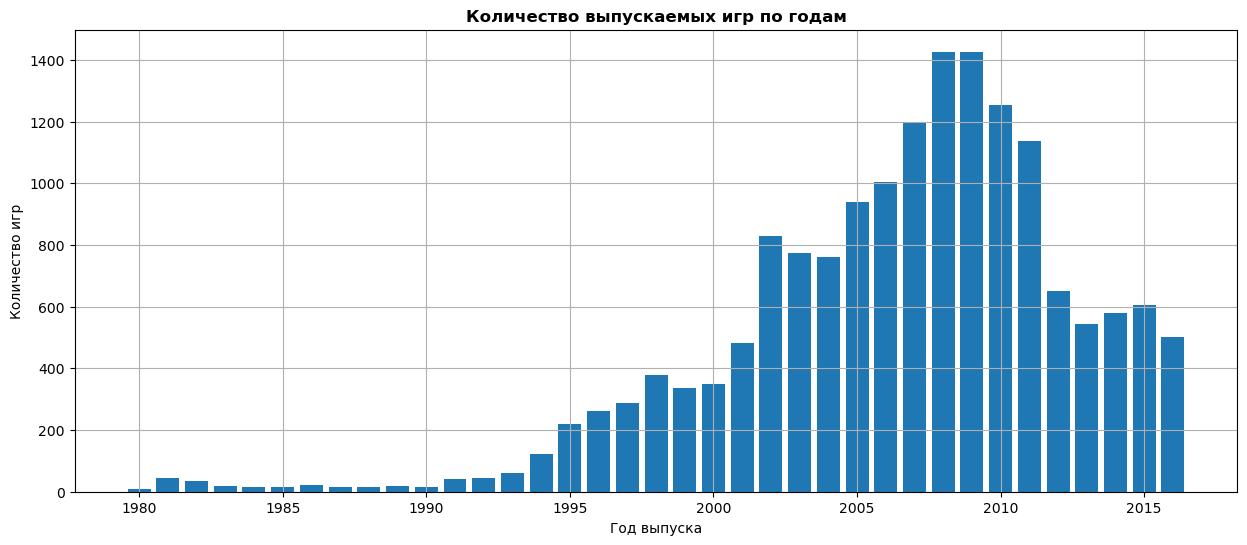

In [126]:
# Cтроим столбчатую диаграмму для столбца 'year_of_release' 
plt.figure(figsize=(15,6))
plt.bar(games.index, games['number_of_games'])
plt.title('Количество выпускаемых игр по годам', fontsize=12, fontweight="bold")
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid()
plt.show()

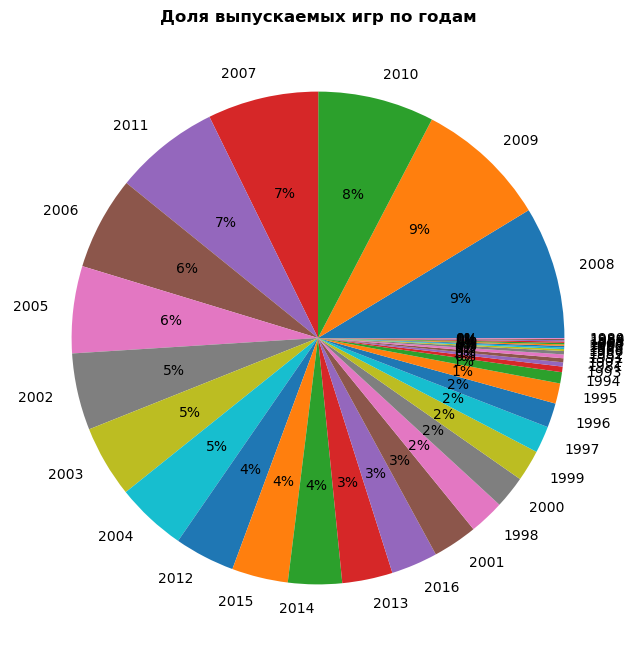

In [127]:
# строим круговую диаграмму для столбца 'year_of_release' 
data['year_of_release'].value_counts().plot(
    kind = 'pie', 
    y = 'year_of_release', 
    autopct = '%1.0f%%', 
    figsize=(8,8))
plt.title('Доля выпускаемых игр по годам', fontsize=12, fontweight="bold")
plt.ylabel('')
plt.show()

Доля игр, выпущенных до 1995 г., мала и для анализа они не значительны. Исключим эти значения из датасета.

In [128]:
best_data = data.query('year_of_release >= 1995').reset_index(drop=True) 

Вычислим долю отброшенных строк, чтобы убедиться, что потеряно не более 10% данных и мы сможем провести актуальный анализ данных.

In [129]:
# Зафиксируем размеры измененного датасета
best_data_start = best_data.shape

# Вычислим процент отброшенных строк
round((1 - best_data_start[0] / data_start[0])*100, 1)

4.5

Мы избавились от 4.5% строк, следовательно можно првести актуальный анализ данных.   

Оценим точнее процент выпускаемых игр в измененном датасете.

In [130]:
# группируем датасет методом groupby по столбцу 'year_of_release', 
best_data_count = best_data.groupby('year_of_release')['name'].agg(['count'])

# Добавляем столбец 'percent' для подсчета процента выпускаемых игр
best_data_count['percent'] = round(best_data_count['count'] / best_data_start[0] * 100, 2)
best_data_count

,count,percent
year_of_release,,
1995,219,1.37
1996,263,1.65
1997,289,1.81
1998,379,2.38
1999,338,2.12
2000,350,2.19
2001,482,3.02
2002,829,5.20
2003,775,4.86


**Вывод:**  
***Количество выпускаемых игр увеличивалось до 2008 года и достигло максимума в 2008 и 2009 годах. Затем наблюдался спад вплоть до 2013 года, обусловленный, вероятно, насыщением рынка, после чего начался незначительный рост в 2014-2015 годах и опять спад в 2016 году. Но, т.к. данные по 2016 году являются крайними в датасете, существует вероятность того, что они неполные.***   

**Изменение продаж по платформам.**

Выясним, какие платформы являются лидерами продаж. Используем данные таблицы `data`

In [131]:
# Сформируем сводную таблицу для подготовки данных перед визуализацией, 
# добавляя столбец с суммой продаж по платформам и сортируя данные по убыванию суммы продаж
platform_sales = data.pivot_table(index = 'platform', values = ['total_sales'], aggfunc = 'sum'
).sort_values(by='total_sales', ascending=False).head(10)
platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


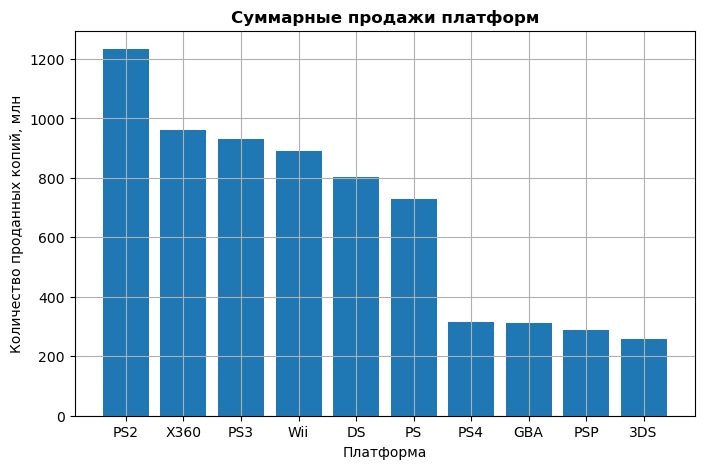

In [132]:
# Cтроим гистограмму для столбца 'total_sales' таблицы platform_sales
plt.figure(figsize=(8,5))
plt.bar(platform_sales.index, platform_sales['total_sales'])  
plt.title('Суммарные продажи платформ', fontsize=12, fontweight="bold")
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.grid()
plt.show()

Выделяются 6 платформ с суммарными продажами более 720 млн копий. Построим распределение продаж этих платформ по годам.

In [133]:
# Создаем таблицу 'top_platform' как срез данных по ТОП-6 платформ таблицы 'data'
top_platform = data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS")')
# Группируем данные по годам и платформам и суммируем продажи
top_platform = top_platform.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

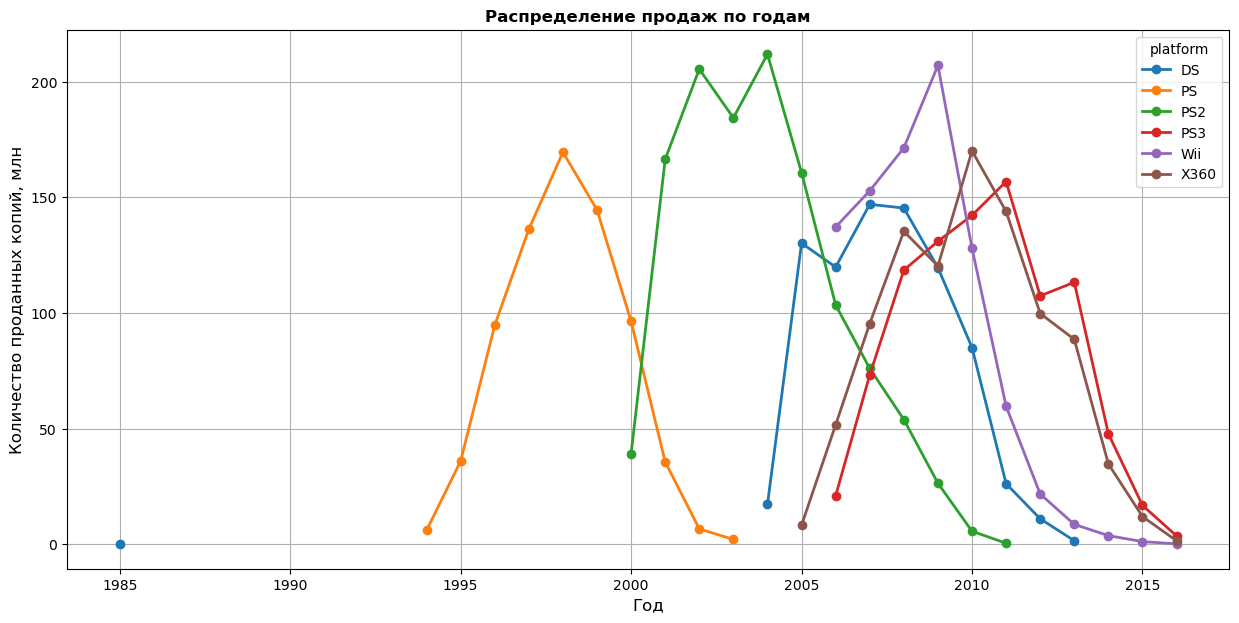

In [134]:
# Cтроим графики распределения продаж по годам для выбранных платформ
top_platform.plot(style='o-', linewidth=2, grid=True, figsize=(15, 7))
plt.title('Распределение продаж по годам', fontsize=12, fontweight="bold")
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество проданных копий, млн', fontsize=12)
plt.show()

**Вывод:**  
***Продажи по каждой из рассматриваемых платформ менялись похожим образом: сначала продажи росли, достигая пика примерно на 4-6 год существования платформы, затем наблюдался постепенный спад, вплоть до прекращения работы платформы.***   

У платформы DS сильно отличается сценарий развития. DS (Nintendo DS) — это портативная игровая консоль, разработанная и выпущенная японской компанией Nintendo. Она была впервые представлена в 2004 году.  
Выясним, что за игра была выпущена в 1985 году.

In [135]:
data.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,ND,0.02


"Strongest Tokyo University Shogi DS" — это видеоигра, разработанная для портативной игровой консоли Nintendo DS, представляющая собой симулятор шоги, традиционной японской настольной игры, которая похожа на шахматы. Однако, до 2004 года DS не получила широкого распространения.   

Для более точного анализа лучше использовать таблицу `best_data` (данные, начиная с 1995 года) 

**За какой характерный срок появляются новые и исчезают старые платформы?**

Появлялись платформы в разные годы, но в 2005-2006 годах появились три платформы - лидеры продаж.  
Три из рассматриваемых платформ (PS2, X360, PS3) перестали существовать.

Составим таблицу продолжительности жизни платформ. Сравним, как долго живут популярные и не очень платформы.   
Допустим предположение, что платформы начинали работать в начале календарного года, а прекращали работу в конце года. Будем считать, что при равенстве первого и последнего лет жизни платформы, срок её жизни составляет один год.

In [136]:
# создадим сводную таблицу
life_duration = best_data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
# переименуем столбцы (мультииндекс) на "первый год" и "последний год"
life_duration.columns = ['platform', 'first_year', 'last_year'] 
# при подсчете продолжительности жизни платформы добавим 1
life_duration['life_duration'] = life_duration.last_year - life_duration.first_year + 1
# Отсортируем таблицу по убыванию продолжительности жизни
life_duration.sort_values(by = 'life_duration', ascending = False).reset_index(drop = True)

,platform,first_year,last_year,life_duration
0,PC,1995,2016,22
1,PSP,2004,2015,12
2,PS2,2000,2011,12
3,X360,2005,2016,12
4,Wii,2006,2016,11
5,PS3,2006,2016,11
6,DC,1998,2008,11
7,DS,2004,2013,10
8,XB,2000,2008,9
9,PS,1995,2003,9


In [137]:
# числовое описание данных столбца 'life_duration' сводной таблицы по всем платформам
life_duration['life_duration'].describe() 

count    26.000000
mean      7.346154
std       4.664267
min       1.000000
25%       4.250000
50%       7.000000
75%      10.750000
max      22.000000
Name: life_duration, dtype: float64

In [138]:
# посмотрим первые годы работы платформы PC на первоначальных даных
data.query('platform == "PC" and year_of_release < 1995').sort_values(by='year_of_release').head() 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14241,Alter Ego,PC,1985,Simulation,0.00,0.03,0.0,0.01,59.0,5.8,T,0.04
14390,SimCity,PC,1988,Simulation,0.00,0.02,0.0,0.01,64.0,2.2,E10+,0.03
759,SimCity 2000,PC,1992,Simulation,1.20,0.84,0.0,0.10,NaN,NaN,ND,2.14
2575,The 7th Guest,PC,1992,Adventure,0.02,0.77,0.0,0.00,NaN,NaN,T,0.79
12452,Syndicate,PC,1992,Strategy,0.00,0.05,0.0,0.01,NaN,NaN,ND,0.06


Для всех платформ средняя продолжительность жизни составляет 7,3 года, медианная - 7 лет.   
Максимальный срок у платформы PC (персональный компьютер) c 1985 года по 2016 г., что говорит о наибольшей устойчивости к изменениям. Однако наличие такого прдолжительного срока жизни сдвигает среднее значение в большую сторону, поэтому медианное значение подходит здесь больше.

Сравним полученные данные с данными о продолжительности жизни ТОП-6 платформ 

In [139]:
# Создаем таблицу 'top_platform' как срез данных по ТОП-6 платформ из таблицы 'best_data'
top_platform = best_data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS")')

In [140]:
# создадим сводную таблицу
top_life_duration = top_platform.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
# переименуем столбцы (мультииндекс) на "первый год" и "последний год"
top_life_duration.columns = ['platform', 'first_year', 'last_year'] 
# при подсчете продолжительности жизни платформы добавим 1
top_life_duration['life_duration'] = top_life_duration.last_year - top_life_duration.first_year + 1
# Отсортируем таблицу по убыванию продолжительности жизни
top_life_duration.sort_values(by = 'life_duration', ascending = False).reset_index(drop = True)

,platform,first_year,last_year,life_duration
0,PS2,2000,2011,12
1,X360,2005,2016,12
2,PS3,2006,2016,11
3,Wii,2006,2016,11
4,DS,2004,2013,10
5,PS,1995,2003,9


In [141]:
# числовое описание данных столбца 'life_duration' сводной таблицы по ТОП-6 платформам
top_life_duration['life_duration'].describe() 

count     6.000000
mean     10.833333
std       1.169045
min       9.000000
25%      10.250000
50%      11.000000
75%      11.750000
max      12.000000
Name: life_duration, dtype: float64

Средняя продолжительность жизни лидеров среди платформ примерно 11 лет. Это выше, чем в среднем по всем данным, что вполне объяснимо их популярностью.  

In [142]:
# Сгруппируем данные по платформам, действие которых не прекращено к 2016 году по возрастанию года выпуска
life_duration.query('last_year == 2016').sort_values(by = 'first_year').reset_index(drop = True)

,platform,first_year,last_year,life_duration
0,PC,1995,2016,22
1,X360,2005,2016,12
2,PS3,2006,2016,11
3,Wii,2006,2016,11
4,3DS,2011,2016,6
5,PSV,2011,2016,6
6,WiiU,2012,2016,5
7,PS4,2013,2016,4
8,XOne,2013,2016,4


По состоянию на 2016 год функционировало 9 платформ. На считая платформы-долгожителя PC, остальные платформы были запущены начиная с 2005 года. 

**Вывод:**  
***Платформы появлялись и исчезали в разные годы, но в среднем период жизни платформы составляет 7 лет, для лидеров продаж - 9 лет. Пик популярности платформы приходится примерно на середину этого срока.***  

Таким образом, нас не интересуют: 
- платформы, продаж у которых не было в последний год, т.к. их жизненный цикл вероятно подходит к концу;  
- платформы старше 10 лет,  которые движутся к завершению своей деятельностии, и, скорее всего, в следующем году продажи для них будут крайне низкими.   

Стоит рассмотреть платформы, которые не старше половины среднего срока жизни платформы, т.е. вышли не раньше 3 лет до 2016 года (2013 г.) и в 2016 году не приближаются к финалу средней продолжительности жизни консоли.

**Какие платформы лидируют по продажам, растут или падают? Выбор нескольких потенциально прибыльных платформ.**

Рассмотрим динамику продаж по платформам с 2013 года.

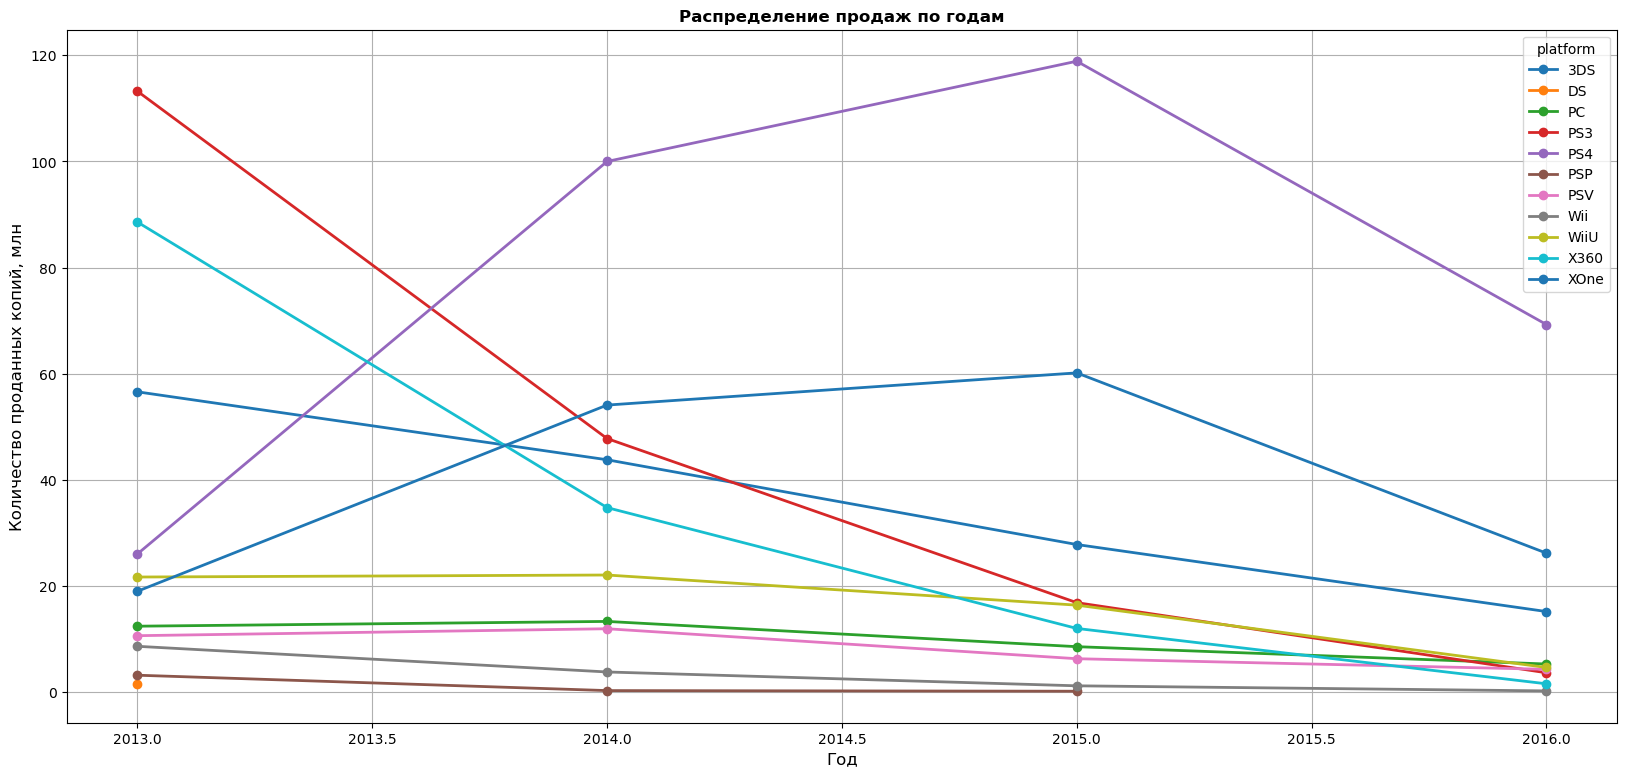

In [143]:
# формируем срез данных по году выпуска, начиная с 2013 
best_data2013 = best_data.query('year_of_release >= 2013')

# группируем данные по годам, платформам и суммируем продажи
(best_data2013
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(style='o-', linewidth=2, grid=True, figsize=(20, 9)))  # строим график 
plt.title('Распределение продаж по годам', fontsize=12, fontweight="bold")
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество проданных копий, млн', fontsize=12)
plt.show()

**Вывод:**  
***На графике наблюдается общая динамика спада продаж по всем платформам к 2016 году. Но, если оценивать тенденцию без учета 2016 года, данные по которому неполные, выделяются две лидирующие платформы. В 2015 году увеличили продажи PS4 и XOne. Они находятся в середине среднего возраста платформы и можно предположить, что их рост продолжится. Их можно отнести к потенциально прибыльным платформам на 2017 год.***  
Невысокие, но более стабильные продажи, чем у конкурентов у платформы-долгожителя PC. 

**Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

In [144]:
# Изучим числовое описание данных для определения параметров построения графика «ящик с усами»
# сформируем сводную таблицу по данным 'best_data2013' 
best_data2013.pivot_table(index='platform', 
    values='total_sales', 
    aggfunc=['sum', 'mean', 'std', 'min', 'median', 'max', 'count']
).sort_values(('median', 'total_sales'), ascending=False)

,sum,mean,std,min,median,max,count
,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales
platform,,,,,,,
X360,136.80,0.735484,1.663275,0.01,0.265,16.27,186
XOne,159.32,0.645020,1.036139,0.01,0.220,7.39,247
PS4,314.14,0.801378,1.609456,0.01,0.200,14.63,392
WiiU,64.63,0.562000,1.038778,0.01,0.200,7.09,115
Wii,13.66,0.593913,0.915432,0.01,0.180,3.58,23
DS,1.54,0.192500,0.172026,0.03,0.150,0.51,8
PS3,181.43,0.525884,1.451939,0.01,0.150,21.05,345
3DS,143.25,0.472772,1.381347,0.01,0.090,14.60,303


Для наглядности построим график «ящик с усами», ограничив предел по количеству проданных копий максимальным медианным значением + одно стандартное отклонение (округленное в большую сторону) 

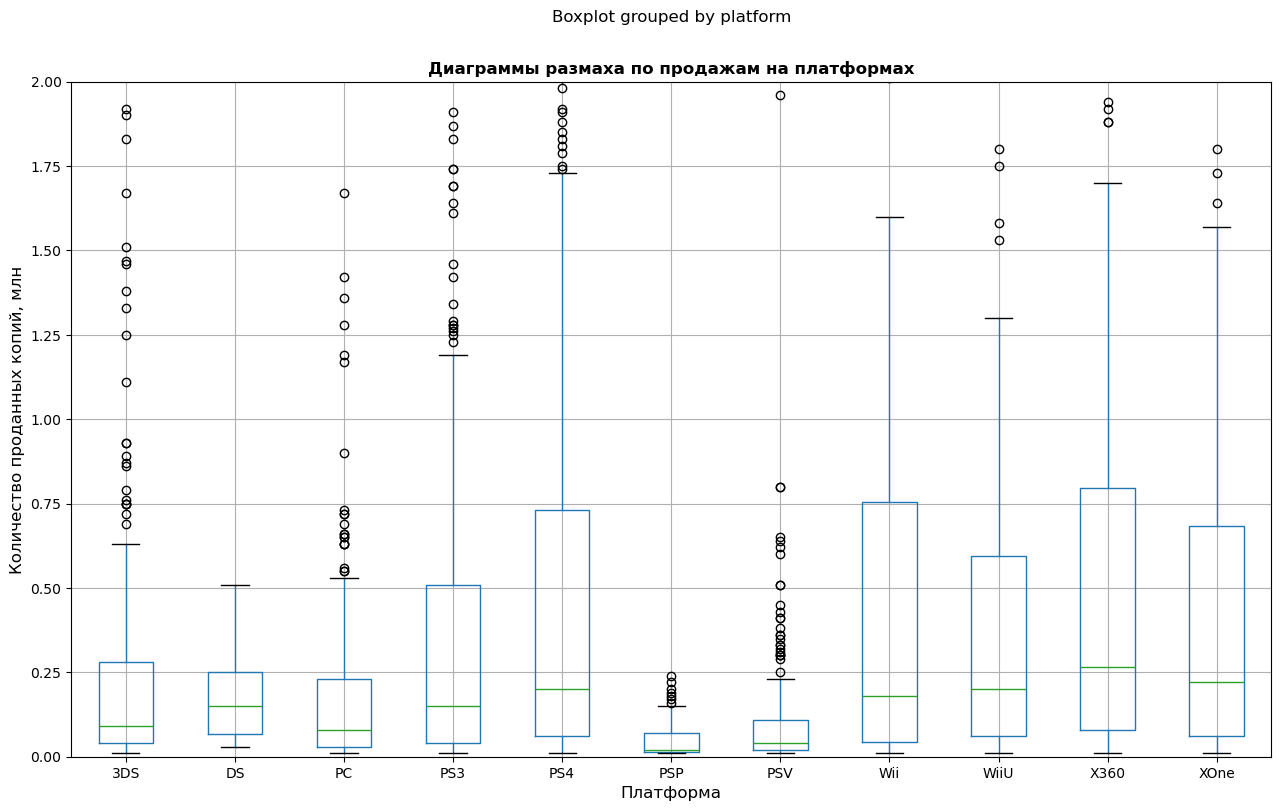

In [145]:
best_data2013.boxplot(column='total_sales', by='platform', figsize=(15,9))
plt.title('Диаграммы размаха по продажам на платформах', fontsize=12, fontweight="bold")
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Количество проданных копий, млн', fontsize=12)
plt.ylim(0, 2)
plt.show()

**Вывод:**  
***Лидером продаж и по сумме, и по количеству игр является PS4.***   
Из графиков и числового описания данных заметно, что размах продаж сильно отличается на разных платформах, при этом медианные значения у лидеров продаж примерно на одном уровне 0,09 - 0,265 млн копий. Большое количество выбросов на нескольких платформах говорит о том, что у них были большие продажи некоторых популярных игр.

**Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.**

Для анализа возьмем платформу PS4, лидирующую по продажам к концу 2016 г. и являющейся потенциально прибыльной на 2017 г.

In [146]:
# Отберем данные по PS4 из таблицы 'best_data2013'
best_data2013_ps4 = best_data2013.query('platform == "PS4"') 

In [147]:
# Посчитаем коэффициент корреляции Пирсона для PS4
print('Корреляция между оценкой критиков и продажами:', 
      round(best_data2013_ps4['critic_score'].corr(best_data2013_ps4['total_sales']), 2))      
print('Корреляция между оценкой пользователей и продажами:', 
      round(best_data2013_ps4['user_score'].corr(best_data2013_ps4['total_sales']), 2))

Корреляция между оценкой критиков и продажами: 0.41
Корреляция между оценкой пользователей и продажами: -0.03


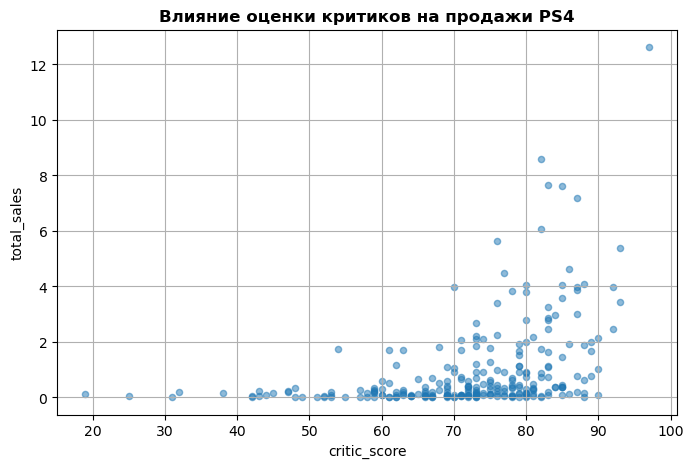

In [148]:
# Построим диаграмму рассеивания между оценкой критиков и продажами
best_data2013_ps4.plot(figsize=(8,5), x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid=True)
plt.title('Влияние оценки критиков на продажи PS4', fontsize=12, fontweight="bold")
plt.show()

***Чем выше оценка критиков, тем выше продажи.***   
Значение коэффициента корреляции (0,41) также подтверждает наличие средней прямой зависимости между оценкой критиков и продажами игр.  

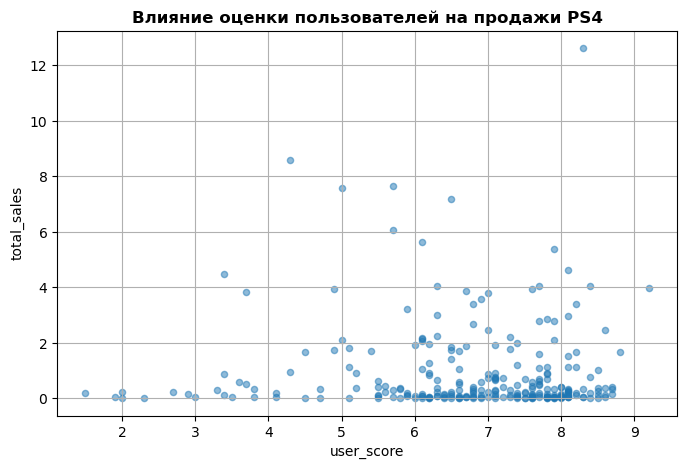

In [149]:
# Построим диаграмму рассеивания между оценкой пользователей и продажами
best_data2013_ps4.plot(figsize=(8,5), x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid=True)
plt.title('Влияние оценки пользователей на продажи PS4', fontsize=12, fontweight="bold")
plt.show()

***С ростом оценки пользователей увеличивается разброс в продажах, но в среднем объем продаж не меняется.***
Между оценками пользователей и продажами корреляция не только слабая, но и обратная (-0,03). 

**Вывод:** ***Оценки критиков влияют на продажи сильнее, чем оценки пользователей.***

**Соотнесение выводов с продажами игр на других платформах.**

Проверим полученные выводы о зависимости продаж игр от оценок критиков и пользователей для различных по популярности платформ.  
Возьмем популярные платформы XOne (вторую по популярности в 2016 году и также являющейся потенциально прибыльной на 2017 г.), PS3, X360.
В качестве не популярной возьмем платформу Wii. Также выберем стабильную платформу-долгожителя PC.  

Расчитаем коэффициенты корреляции Пирсона для этих платформ.

In [150]:
for i in ["XOne", "PS3", "X360", "PC", "Wii"]:
    data_platform = best_data2013.query('platform == @i')
    print(i)
    print('Корреляция между оценкой критиков и продажами:', 
      round(data_platform['critic_score'].corr(data_platform['total_sales']), 2)) 
    print('Корреляция между оценкой пользователей и продажами:', 
      round(data_platform['user_score'].corr(data_platform['total_sales']), 2))
    print('__________________________________________________________')

XOne
Корреляция между оценкой критиков и продажами: 0.42
Корреляция между оценкой пользователей и продажами: -0.07
__________________________________________________________
PS3
Корреляция между оценкой критиков и продажами: 0.33
Корреляция между оценкой пользователей и продажами: 0.0
__________________________________________________________
X360
Корреляция между оценкой критиков и продажами: 0.35
Корреляция между оценкой пользователей и продажами: -0.01
__________________________________________________________
PC
Корреляция между оценкой критиков и продажами: 0.2
Корреляция между оценкой пользователей и продажами: -0.09
__________________________________________________________
Wii
Корреляция между оценкой критиков и продажами: nan
Корреляция между оценкой пользователей и продажами: 0.68
__________________________________________________________


In [151]:
# Отберем данные из таблицы 'best_data2013' для каждой из платформ
best_data2013_xone = best_data2013.query('platform == "XOne"') 
best_data2013_ps3 = best_data2013.query('platform == "PS3"') 
best_data2013_x360 = best_data2013.query('platform == "X360"') 
best_data2013_pc = best_data2013.query('platform == "PC"') 
best_data2013_wii = best_data2013.query('platform == "Wii"') 

Для наглядности построим на одном графике диаграммы рассеивания по всем выбранным платформам в сравнении с PS4.  

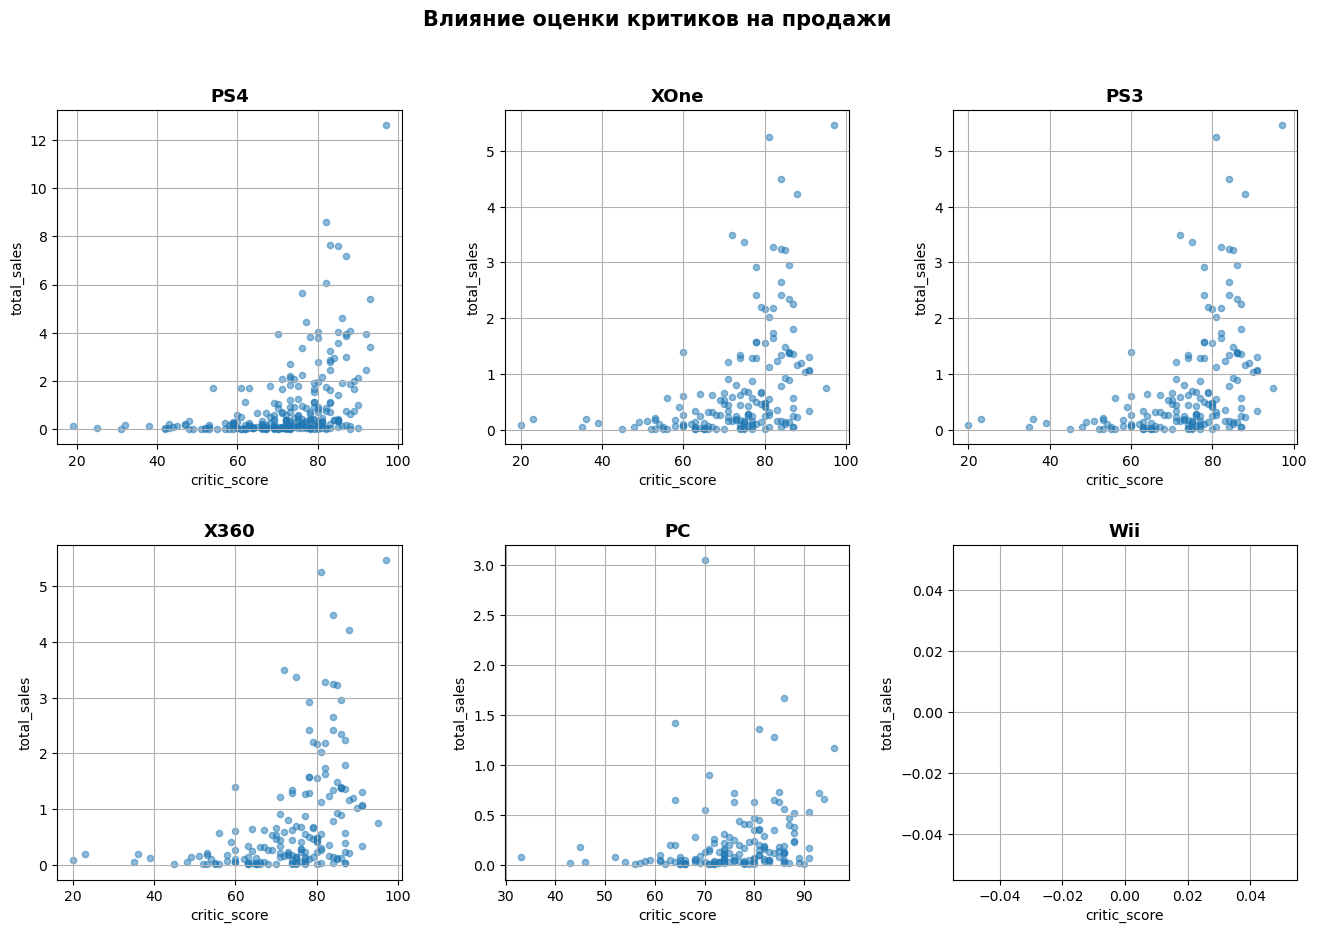

In [152]:
# Строим диаграммы рассеивания на одном графике
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Влияние оценки критиков на продажи', fontsize=15, fontweight="bold")
plt.subplots_adjust(wspace=0.3, hspace=0.3) # Настройка пространства между графиками

# Строим диаграмму рассеивания между оценкой критиков и продажами для PS4
plt.subplot(2, 3, 1)
best_data2013_ps4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, ax=plt.gca())
plt.title('PS4', fontsize=13, fontweight="bold")

# Строим диаграмму рассеивания между оценкой критиков и продажами для XOne
plt.subplot(2, 3, 2)
best_data2013_xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, ax=plt.gca())
plt.title('XOne', fontsize=13, fontweight="bold")

# Строим диаграмму рассеивания между оценкой критиков и продажами для PS3
plt.subplot(2, 3, 3)
best_data2013_xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, ax=plt.gca())
plt.title('PS3', fontsize=13, fontweight="bold")

# Строим диаграмму рассеивания между оценкой критиков и продажами для X360
plt.subplot(2, 3, 4)
best_data2013_xone.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, ax=plt.gca())
plt.title('X360', fontsize=13, fontweight="bold")

# Строим диаграмму рассеивания между оценкой критиков и продажами для PC
plt.subplot(2, 3, 5)
best_data2013_pc.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, ax=plt.gca())
plt.title('PC', fontsize=13, fontweight="bold")

# Строим диаграмму рассеивания между оценкой критиков и продажами для Wii
plt.subplot(2, 3, 6)
best_data2013_wii.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, ax=plt.gca())
plt.title('Wii', fontsize=13, fontweight="bold")

plt.show()

Популярные платформы очень схожи в реакции на оценки критиков. Существует средняя зависимость продаж от оценок критиков.
Для платформы PC, зарекомендовавшей себя очень давно, зависимость от оценок критиков не значительная.
Для непопулярной платформы Wii оценки критиков отсутствуют, что, вероятно, ещё сильнее снижает доходность платформы. 

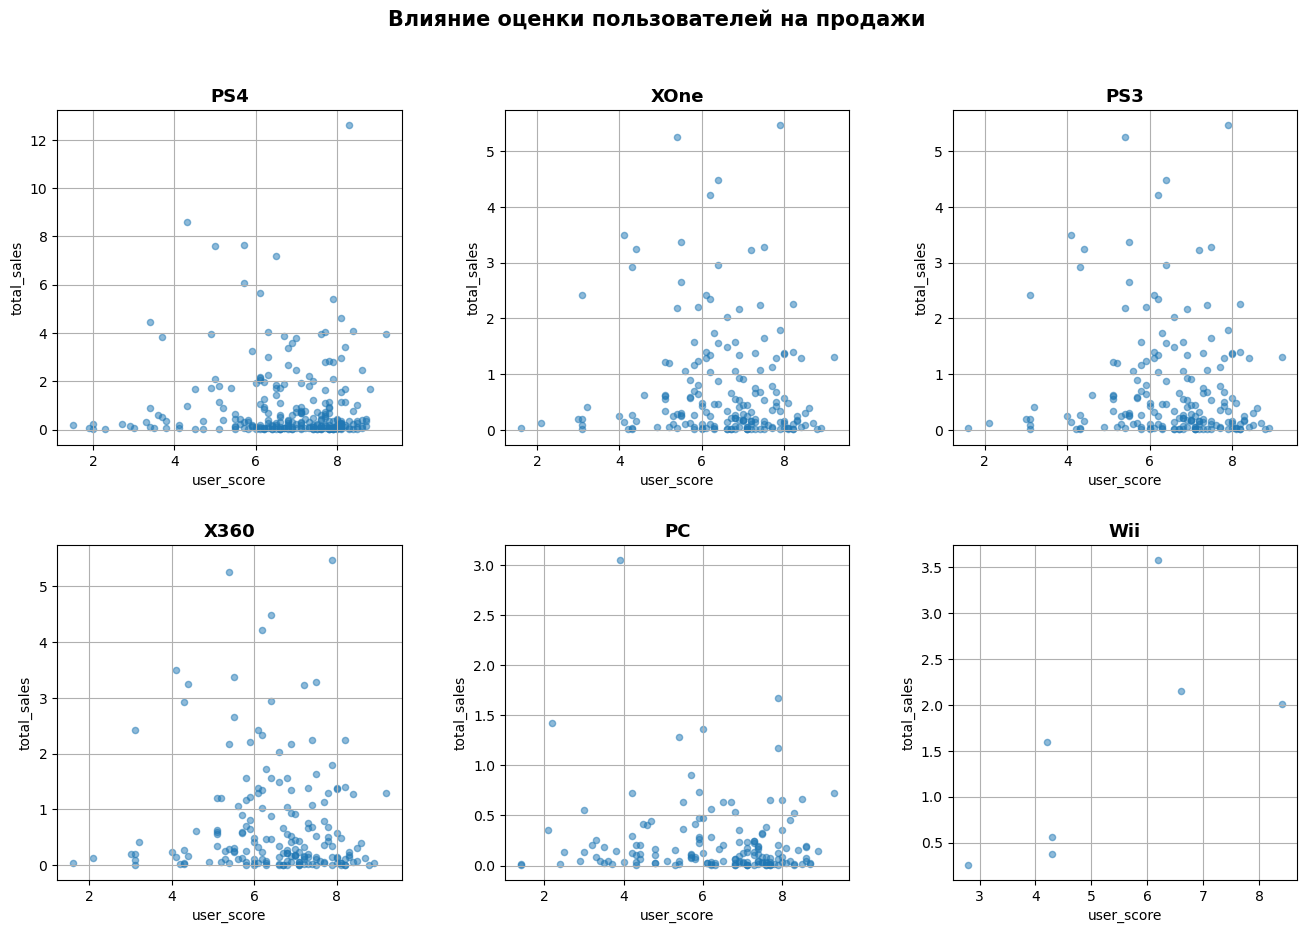

In [153]:
# Строим диаграммы рассеивания на одном графике
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Влияние оценки пользователей на продажи', fontsize=15, fontweight="bold")
plt.subplots_adjust(wspace=0.3, hspace=0.3) # Настройка пространства между графиками

# Строим диаграмму рассеивания между оценкой критиков и продажами для PS4
plt.subplot(2, 3, 1)
best_data2013_ps4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, ax=plt.gca())
plt.title('PS4', fontsize=13, fontweight="bold")

# Строим диаграмму рассеивания между оценкой критиков и продажами для XOne
plt.subplot(2, 3, 2)
best_data2013_xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, ax=plt.gca())
plt.title('XOne', fontsize=13, fontweight="bold")

# Строим диаграмму рассеивания между оценкой критиков и продажами для PS3
plt.subplot(2, 3, 3)
best_data2013_xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, ax=plt.gca())
plt.title('PS3', fontsize=13, fontweight="bold")

# Строим диаграмму рассеивания между оценкой критиков и продажами для X360
plt.subplot(2, 3, 4)
best_data2013_xone.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, ax=plt.gca())
plt.title('X360', fontsize=13, fontweight="bold")

# Строим диаграмму рассеивания между оценкой критиков и продажами для PC
plt.subplot(2, 3, 5)
best_data2013_pc.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, ax=plt.gca())
plt.title('PC', fontsize=13, fontweight="bold")

# Строим диаграмму рассеивания между оценкой критиков и продажами для Wii
plt.subplot(2, 3, 6)
best_data2013_wii.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, grid=True, ax=plt.gca())
plt.title('Wii', fontsize=13, fontweight="bold")

plt.show()

Популярные платформы очень схожи в реакции на оценки пользователей. Отсутствует зависимость от оценок пользователей (коэффициент корреляции равен нулю или отрицательный). 

Для старожила рынка компьютерных игр платформы PC зависимость от оценок пользователей ещё ниже, чем у популярных платформ. Можно сказать, что репутация платформы позволяет ей не зависеть ни от каких оценок.    

Для непопулярной платформы оценки пользователей влияют на продажи сильнее, чем обычно. Коэффициент корреляции 0.68, однако продаж мало и нельзя сделать вывод о том, что такая зависимость является закономерностью. 

**Вывод:**  
***Значения корреляций отличаются, но общая тенденция есть, что подтверждают диаграммы рассеивания. Оценки критиков незначительно влияют на продажи. Влияние оценок пользователей на продажи совсем слабое у лидирующих платформ и среднее у платформ-аутсайдеров.***

**Распределение игр по жанрам.**

Выясним, игры каких жанров являются лидерами продаж, где игры стабильно приносят высокий доход. Для этого изучим числовое описание данных для таблицы 'best_data2013' - продаж начиная с 2013 года и построим график «ящик с усами».

In [154]:
# Изучим числовое описание данных для таблицы 'best_data2013'
# сформируем сводную таблицу по данным 'best_data2013', сортируя по убыванию суммы продаж 
genre_sort = best_data2013.pivot_table(index='genre', 
    values='total_sales', 
    aggfunc=['sum', 'mean', 'std', 'min', 'median', 'max', 'count']
).sort_values(('mean', 'total_sales'), ascending=False)
genre_sort

,sum,mean,std,min,median,max,count
,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales
genre,,,,,,,
Shooter,232.98,1.245882,2.014107,0.01,0.450,14.63,187
Sports,150.65,0.703972,1.219237,0.01,0.240,8.58,214
Platform,42.63,0.576081,0.806808,0.01,0.225,4.32,74
Role-Playing,145.89,0.499623,1.353164,0.01,0.125,14.60,292
Racing,39.89,0.469294,0.964101,0.01,0.120,7.09,85
Fighting,35.31,0.441375,1.048883,0.01,0.125,7.55,80
Action,321.87,0.420196,1.253909,0.01,0.110,21.05,766
Misc,62.82,0.405290,1.007985,0.01,0.100,9.18,155


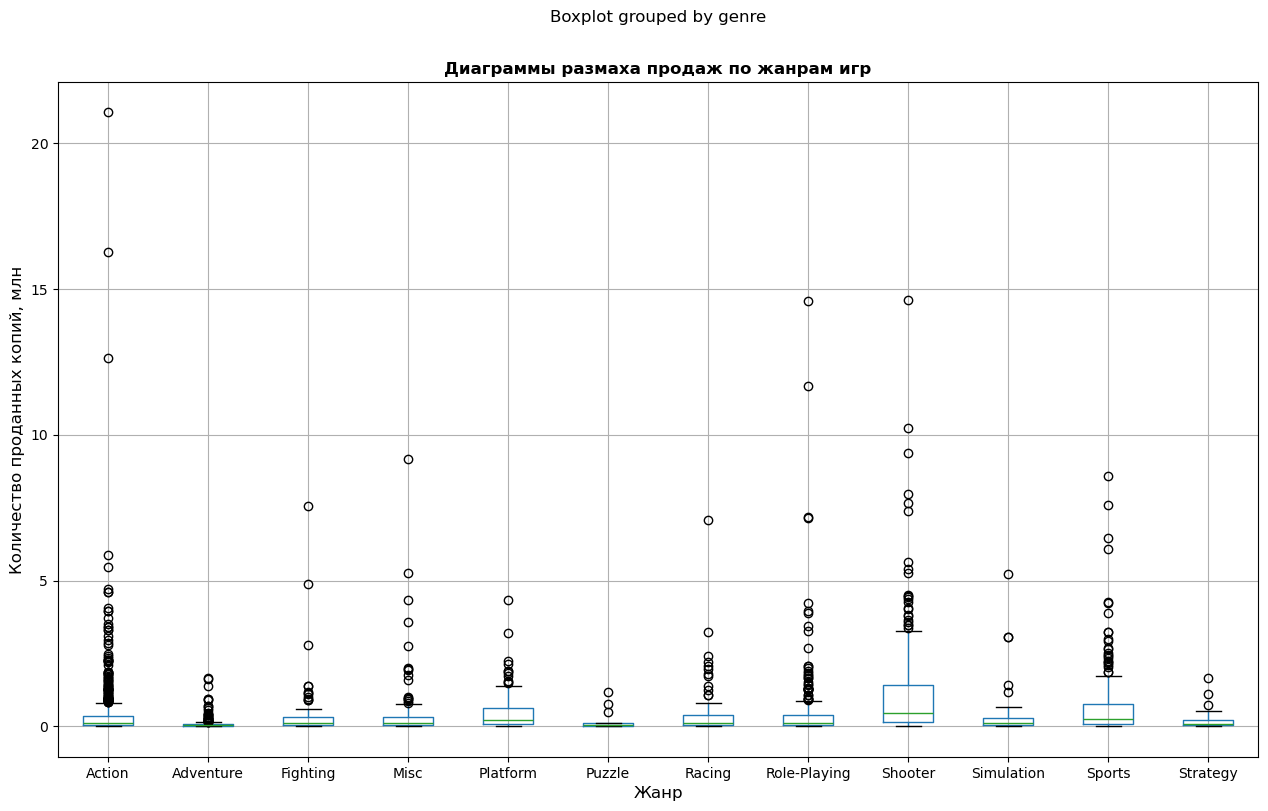

In [155]:
best_data2013.boxplot(column='total_sales', by='genre', figsize=(15,9))
plt.title('Диаграммы размаха продаж по жанрам игр', fontsize=12, fontweight="bold")
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Количество проданных копий, млн', fontsize=12)
plt.show()

Рассмотрим подробнее продажи, составляющие основную часть. Для наглядности ограничим данные до медианного значения + стандартное отклонение, округленное в большую сторону

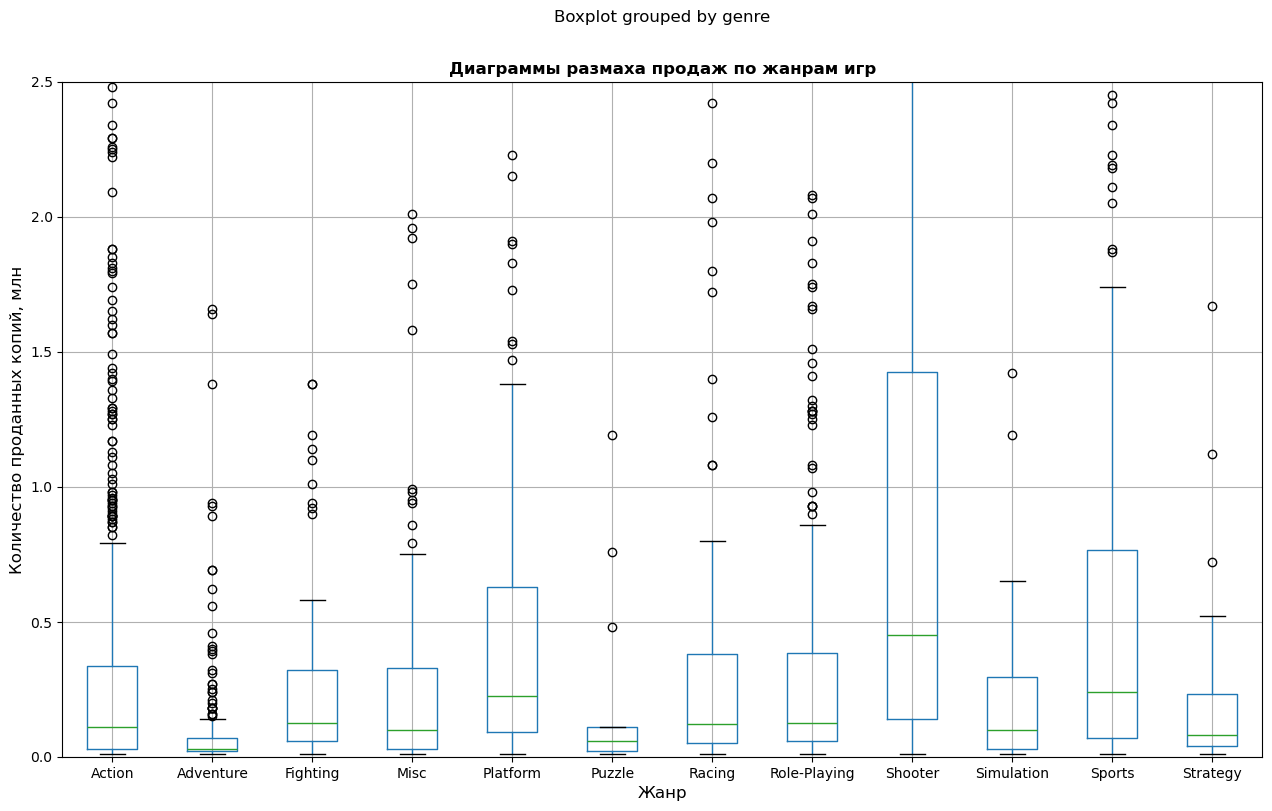

In [156]:
best_data2013.boxplot(column='total_sales', by='genre', figsize=(15,9))
plt.title('Диаграммы размаха продаж по жанрам игр', fontsize=12, fontweight="bold")
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Количество проданных копий, млн', fontsize=12)
plt.ylim(0, 2.5)
plt.show()

Лидером продаж и по общей сумме, и по количеству игр является жанр Action, но его результаты во многом обусловелены выбросами: хитами, приносящими значительный доход. Наиболее популярным является жанр Shooter.	 
Из графиков заметно, что размах продаж сильно отличается по жанрам, при этом медианные значения у всех на уровне 0,03 - 0,45 млн копий. Поэтому для анализа лучше взять медианные значения продаж в зависимости от жанра.

In [157]:
# Сформируем сводную таблицу со средней суммы продаж игр по жанрам, сортируя данные по убыванию
genre_sales = best_data2013.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median'
).sort_values(by='total_sales', ascending=False)
genre_sales.columns = ['median_total_sales'] # переименуем столбец 'total_sales' на 'mean_total_sales'
genre_sales

,median_total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


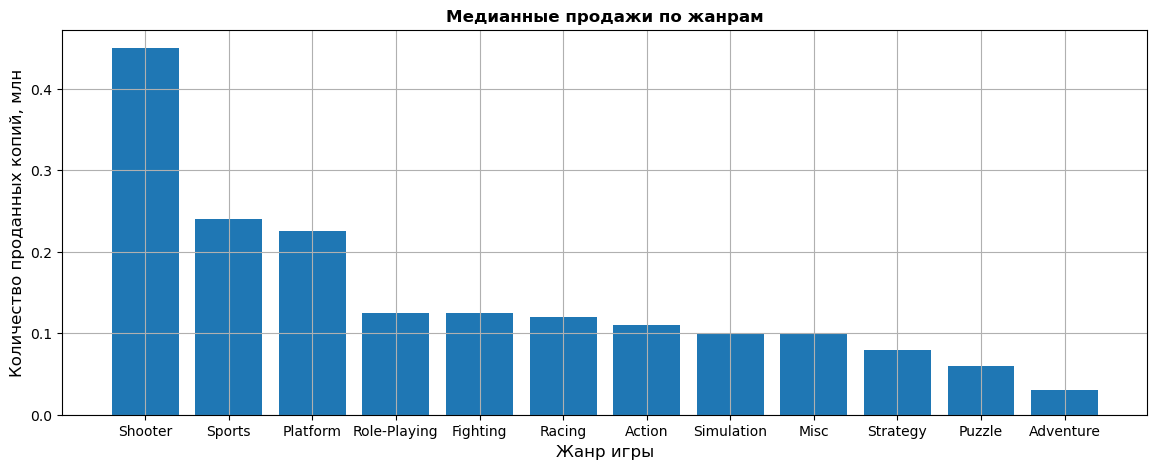

In [158]:
# Cтроим столбчатую диаграмму для столбца 'genre' таблицы genre_sales
plt.figure(figsize=(14, 5))
plt.bar(genre_sales.index, genre_sales['median_total_sales'])  
plt.title('Медианные продажи по жанрам', fontsize=12, fontweight="bold")
plt.xlabel('Жанр игры', fontsize=12)
plt.ylabel('Количество проданных копий, млн', fontsize=12)
plt.grid()
plt.show()

***Самый популярный жанр Shooter, медианные продажи которого значительно превышают остальные. Также наиболее популярными являются спортивные и платформенные игры. остальные игры примерно одинаково популярны. Самыми непопулярными являются приключенческие игры и пазлы.***   

Оценим изменение популярности жанров-лидеров по годам. Построим график медианных продаж игр по жанрам и годам, начиная с 2013.

In [159]:
# Создаем таблицу 'top_genre' как срез данных по ТОП-5 жанров из таблицы 'best_data2013'
top_genre = best_data2013.query('genre in ("Shooter", "Sports", "Platform", "Role-Playing", "Fighting")')

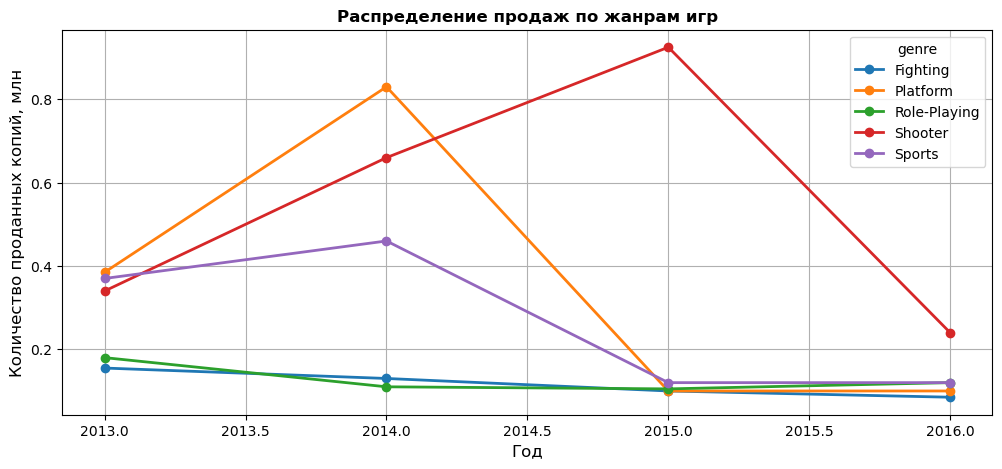

In [160]:
# группируем данные 'best_data2013' по годам, жанрам и суммируем продажи
(top_genre
    .pivot_table(index='year_of_release', columns='genre', values='total_sales', aggfunc='median')
    .plot(style='o-', linewidth=2, grid=True, figsize=(12, 5)))  # строим график 
plt.title('Распределение продаж по жанрам игр', fontsize=12, fontweight="bold")
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество проданных копий, млн', fontsize=12)
plt.show()

**Вывод:**  
***Шутеры становятся популярнее год от года и в 2015 году вышли в лидеры продаж, удерживая свое лидерство и в 2016 году. Учитывая наибольшее среднее и медианное значения суммы продаж, шутеры являются потенциально прибыльным жанром на 2017 год.***

## Портрет пользователя каждого региона

Составим портрет пользователя для отдельных регионов (Северная Америка, Европа, Япония).

**Самые популярные платформы**

In [161]:
# Cформируем сводную таблицу по платформам для суммы продаж каждого региона, 
# отсортировав её по убыванию общей суммы продаж
best_data2013.pivot_table(index='platform', 
    values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales'], 
    aggfunc='sum').sort_values('total_sales', ascending=False)

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
PS4,141.09,15.96,108.74,314.14
PS3,67.81,23.35,63.50,181.43
XOne,51.59,0.34,93.12,159.32
3DS,30.96,67.81,38.20,143.25
X360,42.52,0.51,81.66,136.80
WiiU,19.85,10.88,29.21,64.63
PC,25.36,0.00,11.11,39.43
PSV,6.10,18.59,5.04,32.99
Wii,5.93,0.05,6.56,13.66


Лидеры продаж по регионам отличаются от общемировых. Рассмотрим подробнее топ-5 платформ для каждого региона c 2013 года. 

In [162]:
# Tоп-5 самых продаваемых платформ в Европе
top_platform_eu = best_data2013.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum'
    ).sort_values(by='eu_sales', ascending=False).head(5)
top_platform_eu

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [163]:
# Tоп-5 самых продаваемых платформ в Японии
top_platform_jp = best_data2013.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum'
    ).sort_values(by='jp_sales', ascending=False).head(5)
top_platform_jp

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


In [164]:
# Tоп-5 самых продаваемых платформ в Северной Америке
top_platform_na = best_data2013.pivot_table(
    index='platform', values='na_sales', aggfunc='sum'
    ).sort_values(by='na_sales', ascending=False).head(5)
top_platform_na

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


Сравним данные по долям продаж платформ по регионам на круговых диаграммах.

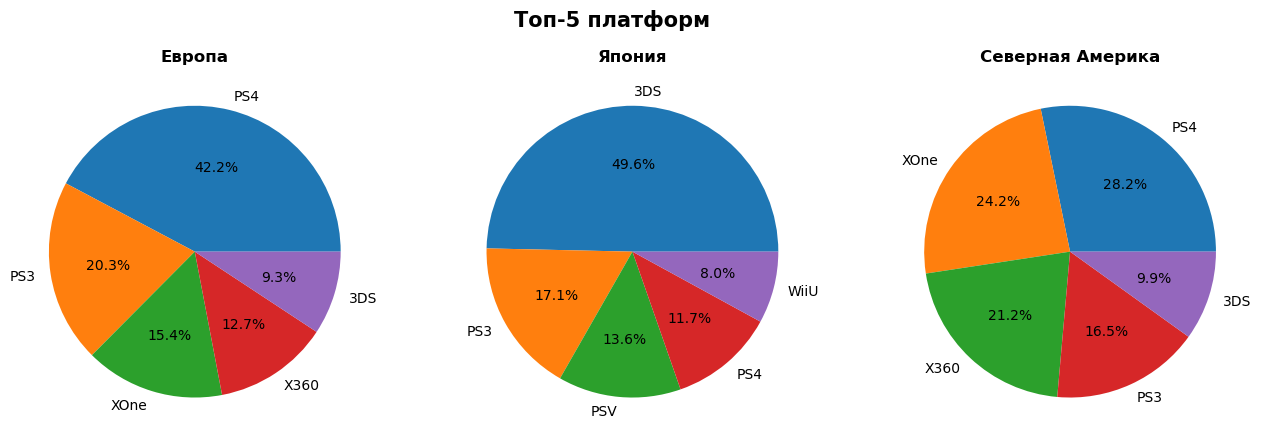

In [165]:
# Строим диаграммы на одном графике
fig = plt.figure(figsize=(16, 5))
fig.suptitle('Топ-5 платформ', fontsize=15, fontweight="bold")

# Строим диаграмму для Топ-5 платформ в Европе
plt.subplot(1, 3, 1)
top_platform_eu.plot(kind='pie', y='eu_sales', autopct='%1.1f%%', legend=False, ax=plt.gca()) 
plt.title('Европа', fontsize=12, fontweight="bold")
plt.ylabel('')

# Строим диаграмму для Топ-5 платформ в Японии
plt.subplot(1, 3, 2)
top_platform_jp.plot(kind='pie', y='jp_sales', autopct='%1.1f%%', legend=False, ax=plt.gca()) 
plt.title('Япония', fontsize=12, fontweight="bold")
plt.ylabel('')

# Строим диаграмму для Топ-5 платформ в Северной Америке
plt.subplot(1, 3, 3)
top_platform_na.plot(kind='pie', y='na_sales', autopct='%1.1f%%', legend=False, ax=plt.gca()) 
plt.title('Северная Америка', fontsize=12, fontweight="bold")
plt.ylabel('')
plt.show()

***В Европе и Северной Америке самая популярная платформа PS4, что соответствует мировому тренду. На втором месте по популярности у американских пользователей платформа Xone, в то время, как в Европе она лишь на третьем месте после PS3. в Японии почти половина пользователей предпочитают 3DS (49.6%), второй по популярности является платформа PS3,  а игры платформы Xone (одного из лидеров рынка Северной Америки и Европы) в Японии практически не продаются.***

**Самые популярные жанры**

In [166]:
# Cформируем сводную таблицу по жанрам для суммы продаж каждого региона, 
# отсортировав её по убыванию общей суммы продаж
best_data2013.pivot_table(index='genre', 
    values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales'], 
    aggfunc='sum').sort_values('total_sales', ascending=False)

,eu_sales,jp_sales,na_sales,total_sales
genre,,,,
Action,118.13,40.49,126.05,321.87
Shooter,87.86,6.61,109.74,232.98
Sports,60.52,5.41,65.27,150.65
Role-Playing,36.97,51.04,46.40,145.89
Misc,20.04,9.20,27.49,62.82
Platform,15.58,4.79,18.14,42.63
Racing,20.19,2.30,12.96,39.89
Fighting,8.55,7.65,15.55,35.31
Adventure,8.25,5.82,7.14,23.64


Жанр Action самый прибыльный за все время продаж в Европе и Северной Америке, что совпадает с общемировым трендом. В Японии предпочтение отдают ролевым играм.  Рассмотрим подробнее топ-5 платформ для каждого региона c 2013 года.

In [167]:
# Tоп-5 самых прибыльных жанров в Европе
top_genre_eu = best_data2013.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum'
    ).sort_values(by='eu_sales', ascending=False).head(5)
top_genre_eu

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [168]:
# Tоп-5 самых продаваемых платформ в Японии
top_genre_jp = best_data2013.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum'
    ).sort_values(by='jp_sales', ascending=False).head(5)
top_genre_jp

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


In [169]:
# Tоп-5 самых продаваемых платформ в Северной Америке
top_genre_na = best_data2013.pivot_table(
    index='genre', values='na_sales', aggfunc='sum'
    ).sort_values(by='na_sales', ascending=False).head(5)
top_genre_na

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


Сравним данные по долям продаж игр различных жанров по регионам на круговых диаграммах.

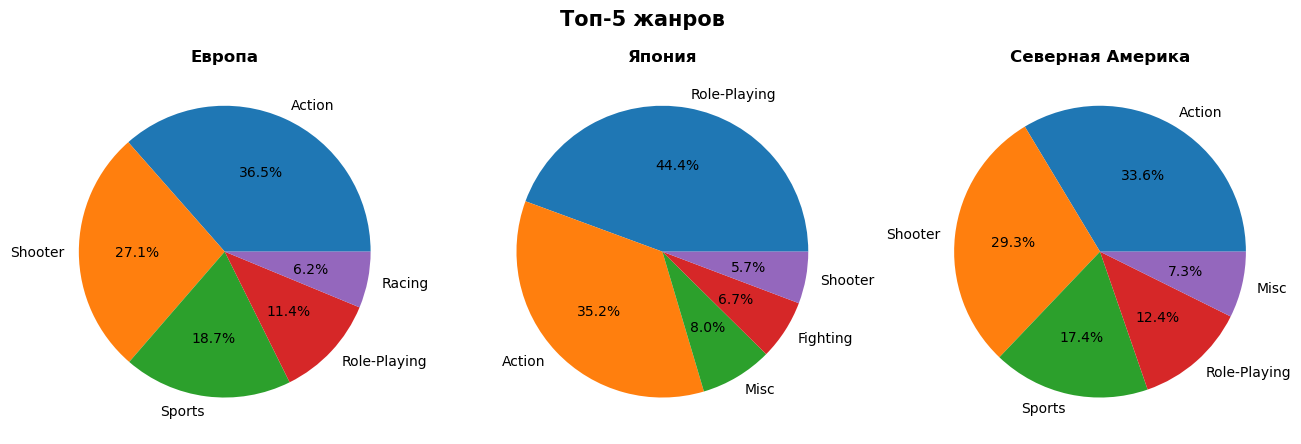

In [170]:
# Строим диаграммы на одном графике
fig = plt.figure(figsize=(16, 5))
fig.suptitle('Топ-5 жанров', fontsize=15, fontweight="bold")

# Строим диаграмму для Топ-5 жанров в Европе
plt.subplot(1, 3, 1)
top_genre_eu.plot(kind='pie', y='eu_sales', autopct='%1.1f%%', legend=False, ax=plt.gca()) 
plt.title('Европа', fontsize=12, fontweight="bold")
plt.ylabel('')

# Строим диаграмму для Топ-5 жанров в Японии
plt.subplot(1, 3, 2)
top_genre_jp.plot(kind='pie', y='jp_sales', autopct='%1.1f%%', legend=False, ax=plt.gca()) 
plt.title('Япония', fontsize=12, fontweight="bold")
plt.ylabel('')

# Строим диаграмму для Топ-5 жанров в Северной Америке
plt.subplot(1, 3, 3)
top_genre_na.plot(kind='pie', y='na_sales', autopct='%1.1f%%', legend=False, ax=plt.gca()) 
plt.title('Северная Америка', fontsize=12, fontweight="bold")
plt.ylabel('')
plt.show()

*Жанровые предпочтения жителей Европы и Северной Америки схожи. Топ-4 жанра совпадают практически с равными долями: лидирует Action (почти треть всех продаж), Shooter (27% и 29% соответственно), Sports и Role-Playing. На пятом месте в Северной америке жанр Misc(игры, которые не подходят строго к стандартным жанрам, включает в себя разнообразные типы игр, например обучающие, виртуальные питомцы и т.д.) В Европе на пятом месте Racing с незначительной долей 6%.  
В Японии два жанра - абсолютные лидеры: ролевые игры (44%) и Action (35%). Спортивные игры, занимающие третью позицию в Европе и Северной Америке не входят в ТОП-5 жанров в Японии.*  

***Жанр Action одинаково популярен во всех регионах (примерно треть всех продаж)***

**Влияние рейтинга ESRB на продажи в отдельном регионе**

In [171]:
# Cформируем сводную таблицу по рейтингу ESRB для суммы продаж каждого региона, 
# отсортировав её по убыванию общей суммы продаж
best_data2013.pivot_table(index='rating', 
    values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales'], 
    aggfunc='sum').sort_values('total_sales', ascending=False)

,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
M,145.32,14.11,165.21,371.68
ND,78.91,85.05,89.42,276.84
E,83.36,15.14,79.05,200.16
T,41.95,20.59,49.79,126.62
E10+,42.69,5.89,54.24,115.39


В общих продажах лидируют игры для взрослых (M). На втором месте игры, для которых рейтинг не определен (ND). На третьем месте игры для всех (E), затем, практически с равной долей, игры для подростков (T) и детей, старше 10 лет (E10+), что практически является одним и тем же.  

Сравним данные по долям продаж игр различных категорий рейтинга ESRB по регионам на круговых диаграммах.

In [172]:
# Создаем таблицы с данными по продажам в зависимости от рейтинга по регионам
rating_eu = best_data2013.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
rating_jp = best_data2013.pivot_table(index='rating', values='jp_sales', aggfunc='sum')                               
rating_na = best_data2013.pivot_table(index='rating', values='na_sales', aggfunc='sum')

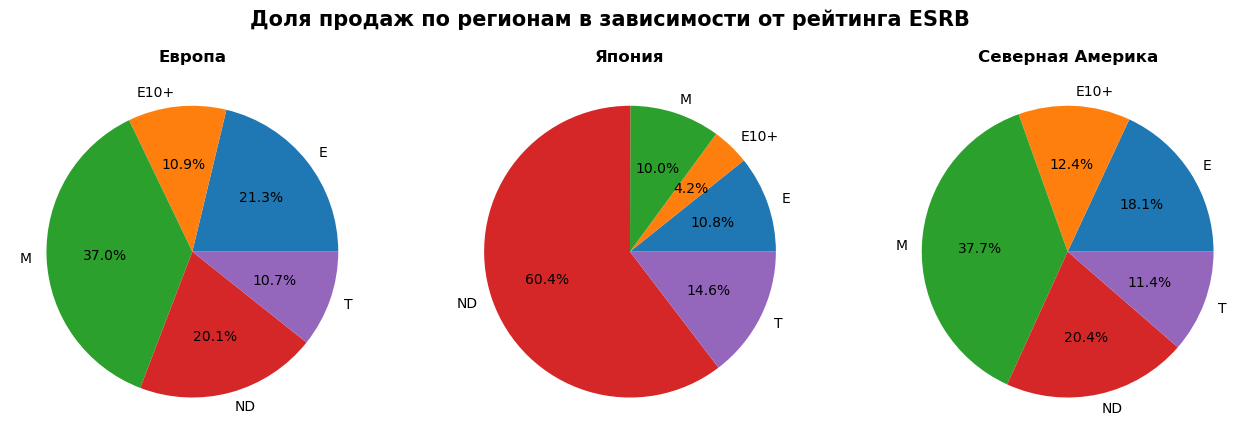

In [173]:
# Строим диаграммы на одном графике
fig = plt.figure(figsize=(16, 5))
fig.suptitle('Доля продаж по регионам в зависимости от рейтинга ESRB', fontsize=15, fontweight="bold")

# Строим диаграмму для Европы
plt.subplot(1, 3, 1)
rating_eu.plot(kind='pie', y='eu_sales', autopct='%1.1f%%', legend=False, ax=plt.gca()) 
plt.title('Европа', fontsize=12, fontweight="bold")
plt.ylabel('')

# Строим диаграмму для Японии
plt.subplot(1, 3, 2)
rating_jp.plot(kind='pie', y='jp_sales', autopct='%1.1f%%', legend=False, ax=plt.gca()) 
plt.title('Япония', fontsize=12, fontweight="bold")
plt.ylabel('')

# Строим диаграмму для Северной Америки
plt.subplot(1, 3, 3)
rating_na.plot(kind='pie', y='na_sales', autopct='%1.1f%%', legend=False, ax=plt.gca()) 
plt.title('Северная Америка', fontsize=12, fontweight="bold")
plt.ylabel('')
plt.show()

***Распределение продаж в Северной Америке и Европе очень схоже и повторяет общемировое, где лидируют игры категории M - "для взрослых (старше 16 лет)". Распределение долей продаж в зависимости от присвоенного рейтинга ESRB практически одинаковое.***

*Вероятно это обусловлено тем, что ESRB (Entertainment Software Rating Board) — это организация, которая определяет рейтинги для видеоигр и приложений в Северной Америке. Для Европы этот рейтинг не является обязательным, но европейские игры часто получают рейтинг ESRB, если они предназначены для продажи на американском рынке. Кроме того, в Европе часто прдаются игры американских производителей.*   

***В Японии 60% продаваемых игр не имеют рейтинг ESRB, т.к. он не является обязательным для игр, созданных в Японии и, например, в Корее.*** 

**Вывод:**  
*Региональные особенности оказывают влияние на популярность платформ и жанров игр.*  

***Портрет европейского и американского пользователя отличается незначительно:*** *наиболее популярны платформы PS4, XOne, X360, PS3;  лидируют экшены, шутеры и спортивные игры.* 

***Портрет японского пользователя кардинально отличается от европейского и американского:*** *популярные платформы 3DS, PS3, PSV и PS4; значительно превосходят остальные по популярности два жанра: ролевые игры и экшены, шутеры лишь на 5 месте.*    

## Проверка гипотез

**Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Платформа Xbox One была запущена в 2013 году, PC гораздо старше. Будем сравнивать данные за аналогичные периоды, поэтому воспользуемся данными таблицы `best_data2013`, предварительно избавимся от пропусков в столбце `user_score	`.

In [174]:
best_data2013_hyp = best_data2013.dropna(subset=['user_score'])  # удаляем строки с пропусками
best_data2013_hyp.shape  # размер получившейся таблицы

(1192, 12)

Сформулируем нулевую и альтернативную гипотезу.  

H0: средние пользовательские рейтинги платформ XOne и PC равны.  
H1 (двусторонняя альтернативная гипотеза): средние пользовательские рейтинги платформ XOne и PC не равны.

Уровень статистической значимости alpfa = 0.05 (5%)  
Совокупности не зависят друг от друга, поэтому воспользуемся двухвыборочным t-тестом для независимых выборок (ttest_ind).  
Т.к. дисперсии выборок могут отличаться, используем параметр equal_var=False.

In [175]:
alpfa = .05  
results = st.ttest_ind(
    best_data2013_hyp[best_data2013_hyp.platform =='XOne']['user_score'], 
    best_data2013_hyp[best_data2013_hyp.platform =='PC']['user_score'], 
    equal_var=False)

print('p-значение:', results.pvalue)

# вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpfa:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу.


Генеральные совокупности небольшие, поэтому проверим себя и посчитаем реальные средние проверяемых совокупностей.

In [176]:
best_data2013_hyp.query('platform in ["XOne", "PC"]'
    ).pivot_table(index='platform', 
    values='user_score', 
    aggfunc=['mean', 'median'])

,mean,median
,user_score,user_score
platform,,
PC,6.269677,6.8
XOne,6.521429,6.8


Данные не противоречат гипотезе, медианные средние равны.  

***Получили достаточно большую вероятность (14.8%) равенства средних пользовательских рейтингов платформ XOne и PC, чтобы отвергнуть гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.***  

**Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные**

H0: средние пользовательские рейтинги жанров Action и Sports равны.  
H1 (двусторонняя альтернативная гипотеза): средние пользовательские рейтинги жанров Action и Sports не равны.

Уровень статистической значимости alpfa = 0.05 (5%)  
Совокупности не зависят друг от друга, поэтому воспользуемся двухвыборочным t-тестом для независимых выборок (ttest_ind).  
Т.к. дисперсии выборок могут отличаться, используем параметр equal_var=False.

In [177]:
alpfa = .05  
results = st.ttest_ind(
    best_data2013_hyp[best_data2013_hyp.genre =='Action']['user_score'], 
    best_data2013_hyp[best_data2013_hyp.genre =='Sports']['user_score'], 
    equal_var=False)

print('p-значение:', results.pvalue)

# вывод об отвержении или неотвержении нулевой гипотезы
if results.pvalue < alpfa:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу.


Проверим себя и посчитаем реальные средние проверяемых совокупностей.

In [178]:
best_data2013_hyp.query('genre in ["Action", "Sports"]'
    ).pivot_table(index='genre', 
    values='user_score', 
    aggfunc=['mean', 'median'])

,mean,median
,user_score,user_score
genre,,
Action,6.837532,7.1
Sports,5.238125,5.5


И средние и медианные значения пользовательских рейтингов жанра Action больше аналогичных показателей жанра Sports.

***Проведя статистический тест убедились, что вероятность равенства средних пользовательских рейтингов жанров Action и Sports минимальна. Нулевую гипотезу отвергли, следовательно верна альтернативная гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные.***   

## Общий вывод

**Цель данного проекта:** выявить определяющие успешность игры закономерности,  которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Входные данные от интернет-магазина компьютерных игр «Стримчик»** — исторические данные до 2016 года из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

**1. Открыт файл с данными** и изучена общая информация о них.  

**2. Проведена предобработка данных:** 
После предобработки данных названия всех столбцов датафрейма записаны в едином стиле.
Избавились от нескольких строк с пропусками в столбцах name, year_of_release, genre, заменили пропуски в столбце rating на аналогичное ND - не определен, пропуски оставили только в столбцах critic_score и user_score, где заменять их не целесообразно, в столбце user_score заменили значения tbd (Будет определено) на NaN. Проверили, что явные и неявные дубликаты отсутствуют.
В таблицу добавили столбец total_sales с суммарными продажами во всех регионах.

**3. Проведен исследовательский анализ данных.** Описана и визуализирована общая информация:   

- количество выпускаемых игр по годам (*избавились от 4.5% строк, содержащих игры, выпущенные до 1995 г.*);  
  
  
- изменение продаж по платформам (*как правило продажи сначала растут, достигая пика примерно на 4-6 год существования платформы, затем наблюдается постепенный спад, вплоть до прекращения работы платформы*);  
  
  
- характерный срок появления новых и исчезновения старых платформ (*средний период жизни платформы составляет 7 лет, для лидеров продаж - 9 лет, пик популярности платформы приходится примерно на середину этого срока*);  
  
  
- платформы-лидеры по продажам, выбраны несколько потенциально прибыльных платформ (*Выделяются две лидирующие платформы: PS4 и XOne. Они находятся в середине среднего возраста платформы и можно предположить, что их рост продолжится. Их можно отнести к потенциально прибыльным платформам на 2017 год.*);  
  
  
- построен график «ящик с усами» по глобальным продажам игр в разбивке по платформам (*лидером продаж и по сумме, и по количеству игр является PS4*);   
  
  
- изучено влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков (*оценки критиков влияют на продажи сильнее, чем оценки пользователей*);  
  
  
- выводы соотнесены с продажами игр на других платформах (*Значения корреляций отличаются, но общая тенденция есть, что подтверждают диаграммы рассеивания. Оценки критиков незначительно влияют на продажи. Влияние оценок пользователей на продажи совсем слабое у лидирующих платформ и среднее у платформ-аутсайдеров.*);   
  
  
- изучено общее распределение игр по жанрам (*Самый популярный жанр Shooter, медианные продажи которого значительно превышают остальные. Также наиболее популярными являются спортивные и платформенные игры. остальные игры примерно одинаково популярны. Самыми непопулярными являются приключенческие игры и пазлы*). 
    
***Вывод:*** ***Платформа PS4, лидирующая по количеству игр и продажам к концу 2016 г. находится примерно на середине срока развития платформы, поэтому является потенциально прибыльной на 2017 г.***  *Шутеры становятся популярнее год от года и в 2015 году вышли в лидеры продаж, удерживая свое лидерство и в 2016 году. Учитывая наибольшее среднее и медианное значения суммы продаж,* ***шутеры являются потенциально прибыльным жанром на 2017 год.***

**4. Составлен портрет пользователя каждого региона.** Определены для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5), жанры (топ-5) и влияние рейтинга ESRB на продажи в отдельном регионе.  

***Вывод: Региональные особенности оказывают влияние на популярность платформ и жанров игр. Т.к. рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки, его влияние заметнее в этом регионе и Европе. Популярность игр в Японии не зависит от этого рейтинга.***
  
  ***Портрет европейского и американского пользователя отличается незначительно***  *: наиболее популярны платформы PS4, XOne, X360, PS3; лидируют экшены, шутеры и спортивные игры.*
  
  ***Портрет японского пользователя кардинально отличается от европейского и американского*** *: популярные платформы 3DS, PS3, PSV и PS4; значительно превосходят остальные по популярности два жанра: ролевые игры и экшены, шутеры лишь на 5 месте.*

**5. Проверили гипотезы:**  

   ***Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.***   
   
   ***Вывод: гипотеза подтверждается.*** *Получили достаточно большую вероятность (14.8%) равенства средних пользовательских рейтингов платформ XOne и PC, чтобы отвергнуть гипотезу. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, что подтверждается реальными средними.*

   ***Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.***  
   
   ***Вывод: гипотеза подтверждается.*** *Проведя статистический тест убедились, что вероятность равенства средних пользовательских рейтингов жанров Action и Sports минимальна.*

**Рекомендации.**  
***Для увеличения выручки компании следует развивать продажи платформ PS4 и XOne, сделать ставку на рекламу шутеров для Европы и Северной Америки, обеспечить поддерживающей рекламой игры жанра экшен во всех регионах.***  